# Площадь под графиком и управление порогом
## Цель работы
Научиться применять кривые PR и ROC для оценки моделей классификации, использовать их для выбора оптимального порога классификации

## Содержание работы
1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.
2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).
3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.
4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.
5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### 1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [5]:
model = LogisticRegression().fit(X_train, y_train)

In [6]:
y_pred_proba = model.predict_proba(X_test)

In [7]:
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

### 2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

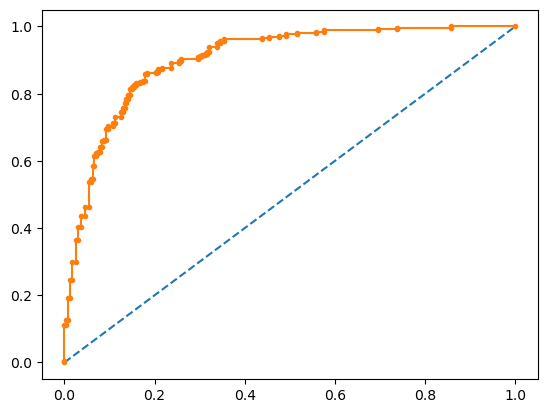

In [10]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [11]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

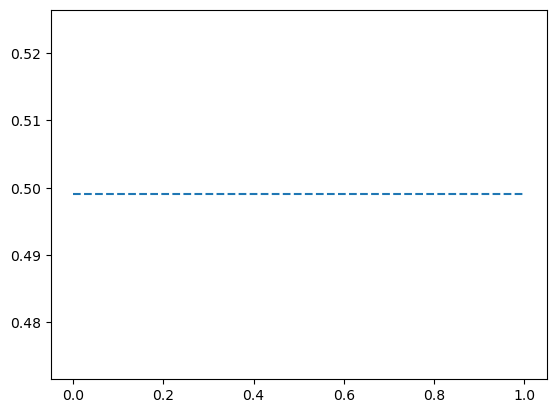

In [13]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

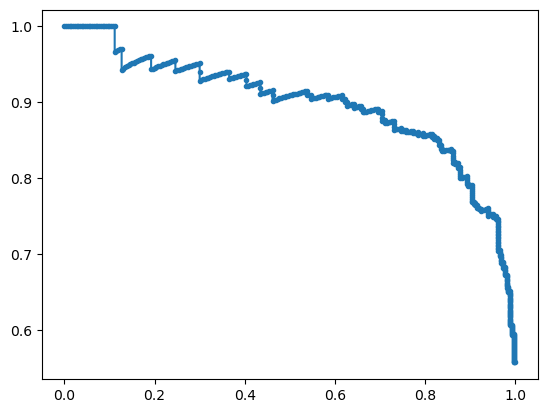

In [14]:
plt.plot(recall, precision, marker='.')
plt.show()

In [15]:
auc(recall, precision)

0.8977244980325833

In [16]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



### 3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

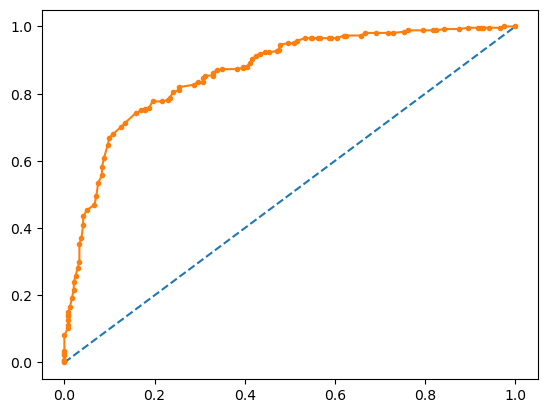

In [18]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

### 4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.

In [20]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [23]:
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [24]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [25]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



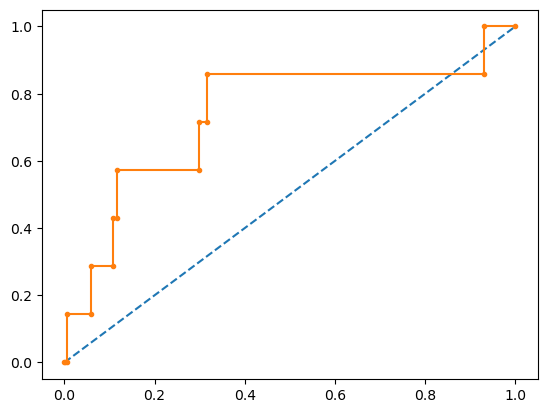

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [27]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.738046942915097

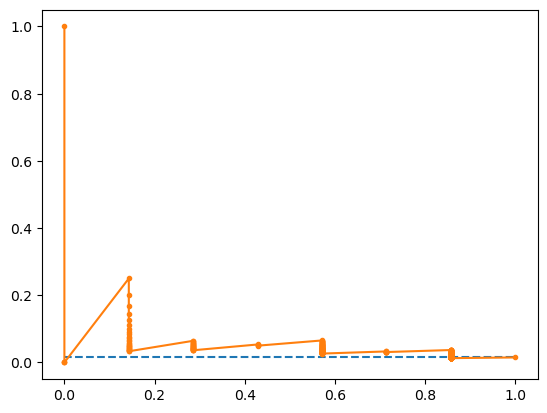

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [29]:
auc(recall, precision)

0.050625765967986056

### 5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [30]:
from numpy import argmax

In [31]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

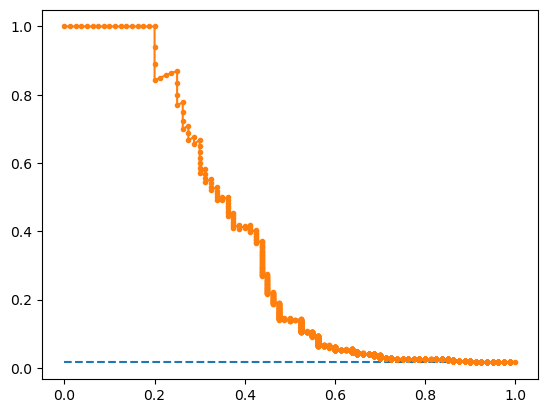

In [32]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [33]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.13614909018175161

In [34]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.136149, F-Score=0.420


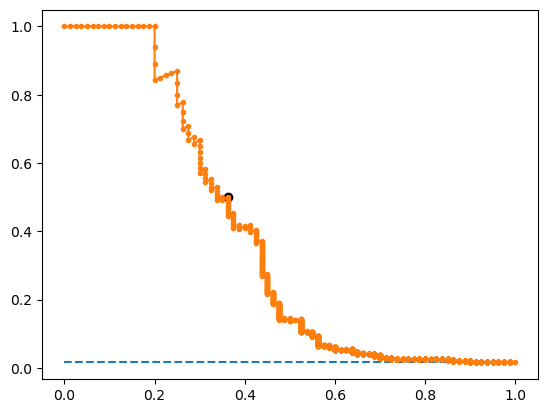

In [35]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [36]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.49      0.35      0.41        80

    accuracy                           0.98      5000
   macro avg       0.74      0.67      0.70      5000
weighted avg       0.98      0.98      0.98      5000



In [38]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       1.00      0.17      0.30        80

    accuracy                           0.99      5000
   macro avg       0.99      0.59      0.65      5000
weighted avg       0.99      0.99      0.98      5000



Модель с порогом по умолчанию показывает лучший результат нежеле чем с порогом 

## Задания для самостоятельного выполнения

### 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

In [39]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_probs = model.predict_proba(X_test)[:, 1]

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

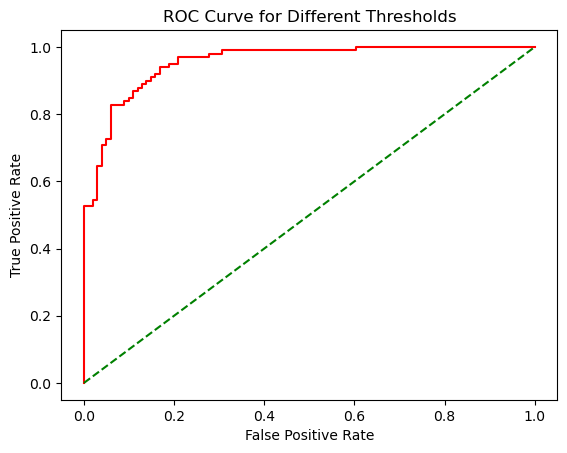

In [44]:
plt.plot(fpr, tpr, label='ROC Curve', color = 'red')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Thresholds')
plt.show()

In [45]:
roc_auc_score(y_test, y_probs)

0.9545954595459546

### 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [46]:
from sklearn.datasets import load_breast_cancer

In [47]:
data = load_breast_cancer()
X = data.data
y = data.target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/egorprozorov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_probs = model.predict_proba(X_test)[:, 1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

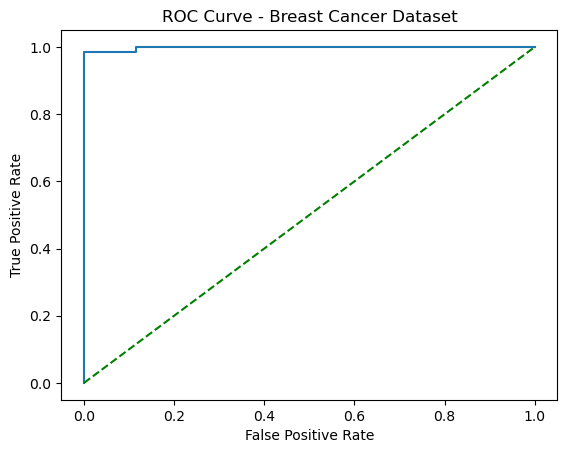

In [52]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Breast Cancer Dataset')
plt.show()

In [53]:
roc_auc_score(y_test, y_probs)

0.9983622666229938

### 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [54]:
geom_mean = np.sqrt(tpr * (1 - fpr))
optimal_threshold_index = np.argmax(geom_mean)
optimal_threshold = thresholds[optimal_threshold_index]

In [55]:
optimal_threshold

0.7942604841897715

### 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

In [56]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)

In [57]:
precision_optimal_threshold = pr_thresholds[np.argmax(precision)]

In [58]:
recall_optimal_threshold = pr_thresholds[np.argmax(recall)]

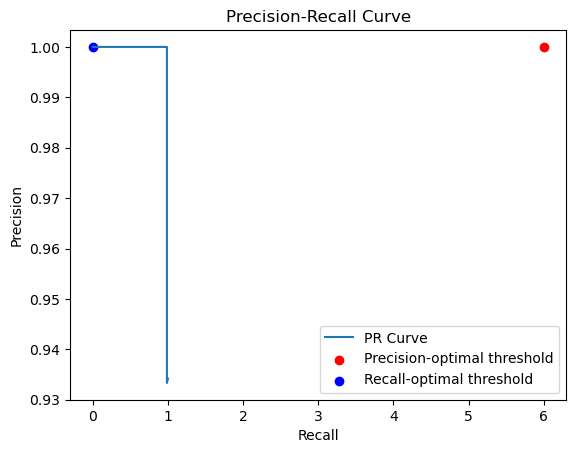

In [59]:
plt.plot(recall, precision, label='PR Curve')
plt.scatter(np.argmax(precision), precision[np.argmax(precision)], color='red', label='Precision-optimal threshold')
plt.scatter(np.argmax(recall), recall[np.argmax(recall)], color='blue', label='Recall-optimal threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [60]:
precision_optimal_threshold, recall_optimal_threshold

(0.7942604841897715, 0.3355887247359753)

### 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

In [62]:
data = load_iris()
X = data.data
y = data.target

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred = rf.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)

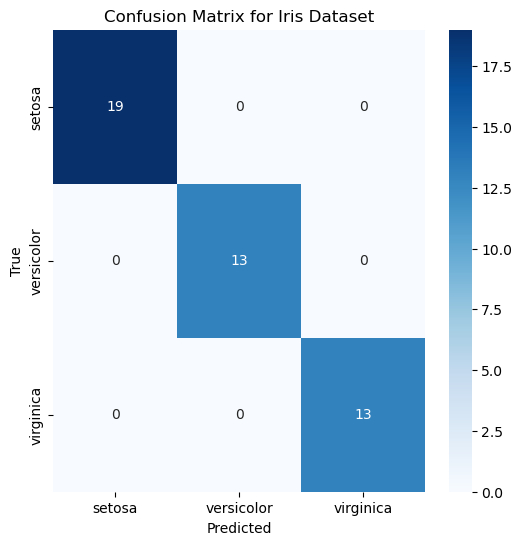

In [67]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

**1. Какие модели можно оценивать с помощью классификационных кривых (ROC и PR) и почему именно их?**

Классификационные кривые, такие как ROC (Receiver Operating Characteristic) и PR (Precision-Recall), можно использовать для оценки моделей, которые решают задачи классификации, особенно бинарной классификации. Эти кривые помогают оценить, насколько хорошо модель различает положительный и отрицательный классы, а также как хорошо она работает при различных порогах принятия решения.

- **ROC-кривая** используется для оценки моделей, которые пытаются предсказать вероятность принадлежности объекта к положительному классу.
- **PR-кривая** предпочтительнее, когда классы сильно несбалансированы, так как она более четко отображает производительность модели для меньшинства класса.

**2. В каких случаях лучше использовать PR-кривую, а в каких - ROC и почему?**

- **PR-кривая**: Лучше использовать, когда классы сильно несбалансированы, то есть один класс встречается гораздо реже, чем другой. PR-кривая в таких случаях более информативна, поскольку она фокусируется на производительности модели на меньшинственном классе, что важно в таких задачах, как детекция спама или диагностика заболеваний.
  
- **ROC-кривая**: Хорошо подходит для сбалансированных классов. ROC-кривая оценивает производительность модели по всем классам, и её можно использовать для общей оценки модели, так как она показывает компромисс между чувствительностью (recall) и специфичностью (1 - false positive rate).

**3. Какие виды усреднения вы знаете (micro, macro) и в чем особенности их применения?**

- **Micro-усреднение**: В этом случае метрики (такие как точность, полнота, F1-меры) рассчитываются на основе глобальных сумм истинных положительных, ложных положительных, истинных отрицательных и ложных отрицательных значений для всех классов. Это дает представление о производительности модели в целом. Обычно используется, когда важна общая производительность модели, а не отдельно взятые классы.

- **Macro-усреднение**: Здесь метрики рассчитываются для каждого класса отдельно, а затем усредняются. Каждый класс имеет одинаковый вес при усреднении, что может быть полезно, если классы имеют схожую важность, и мы не хотим, чтобы доминирующий класс (при дисбалансе классов) влиянил на результаты.

**4. Как вычисляются метрики для построения кривых в задачах множественной классификации?**

Для построения кривых (ROC или PR) в задачах множественной классификации метрики обычно вычисляются для каждого класса отдельно, затем результаты агрегируются. Это можно делать разными способами:

- **One-vs-Rest (OvR)**: Для каждого класса строится отдельная кривая ROC или PR, сравнивая один класс с остальными. Например, в задаче с тремя классами A, B и C будет построено три кривых (для A против B и C, для B против A и C, для C против A и B).
  
- **One-vs-One (OvO)**: Построение кривой для каждой пары классов, сравнивая их между собой.

После этого можно использовать методы усреднения (например, micro или macro), чтобы объединить результаты для всех классов и получить одну кривую.

**5. Почему при построении кривых с помощью yellowbrick на графике отображаются сразу несколько кривых и что они значат?**

При использовании библиотеки Yellowbrick для построения кривых (например, ROC или PR), на графике отображаются несколько кривых для разных классов или для различных методов усреднения. Эти кривые показывают производительность модели для каждого класса или агрегированно для всех классов.

- **Кривые для каждого класса**: Отображают производительность модели для каждого конкретного класса в задаче многоклассовой классификации.
  
- **Кривые для усреднения**: Например, micro и macro усреднение показывают общую производительность модели с учётом всех классов. Micro усреднение агрегирует результаты по всем классам, а macro усреднение усредняет метрики для каждого класса. 

Таким образом, можно оценить, насколько хорошо модель работает для разных классов, а также получить общее представление о её производительности.